# Functions

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path

FIGS_DIR = Path("./tex/figs/").resolve()

plt.style.use("../custom.matplotlibrc")
P_max = 32  # The maximum value that can be used for P
powers_of_two = [pow(2, i + 1) for i in range(P_max)]
indices = np.array(list(range(1, P_max + 1)))


def generate_histogram(ax, number_of_sequences, number_of_coin_flips, 
                       propability_for_tails = lambda index: 0.5, label="Generated Data"):
    """
    
    First Generate an S x P sized array with numbers from a uniform distribution between 0 and 1.
    Then check if that number is heads (1) or tails (0) based on the specificed probability of tails.
    Generate a normalized histogram of the observables of all sequences.
    
    :param ax: Axes for saving the histogram
    :param int number_of_sequences: number of observables to generate.
    :param int number_of_coin_flips: number of coin_flips per sequence.
    :param probalility_for_tails: probability of tails (0). This has to be a function 
        of the index j of the coin-flip inside the sequence.
        
    """
    
    uniformly_generated_numbers = np.random.uniform(low=0, high=1, 
                                size=(number_of_sequences, number_of_coin_flips))
    probability_for_indices = propability_for_tails(indices[:number_of_coin_flips]) 
    coin_flips = np.apply_along_axis(lambda arr: arr >= probability_for_indices, 1, uniformly_generated_numbers)
    numbers = (coin_flips / powers_of_two[:number_of_coin_flips]).sum(axis=1)

    ax.hist(numbers, bins=15, density=True, label=label)


## Exercise 1 Uniform Distribution

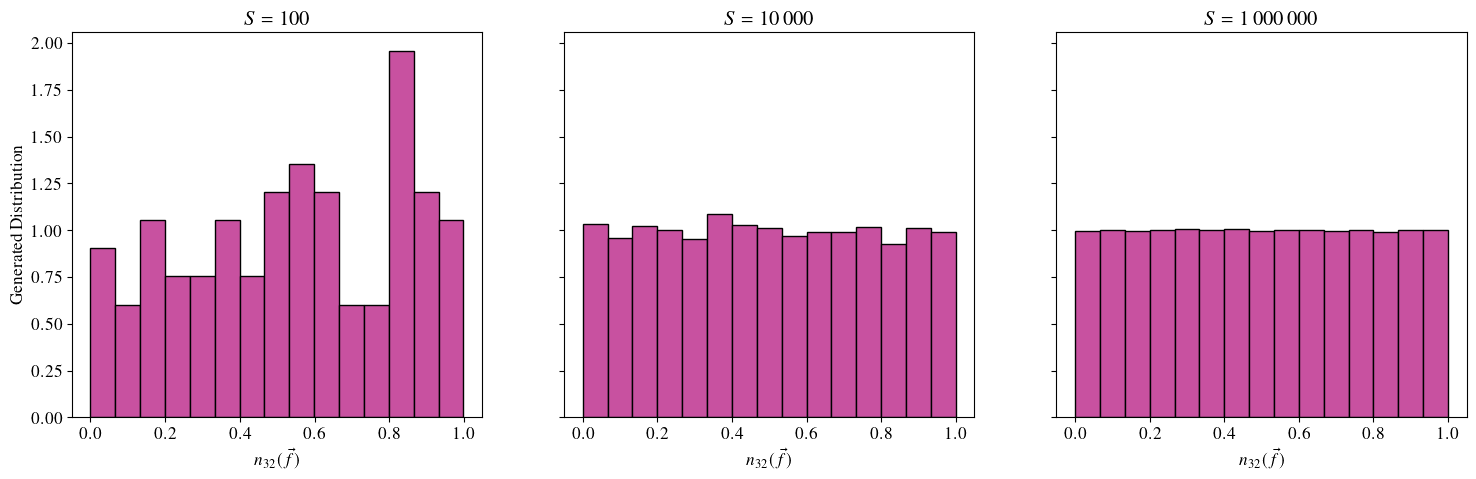

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
ax[0].set_ylabel(r"Generated Distribution")

for i, s in enumerate([pow(10, exponent) for exponent in [2, 4, 6]]):

    ax[i].set_title(f"$S = \\num{{{s}}}$")
    ax[i].set_xlabel(f"$n_{{{P}}}(\\vec f)$")
    generate_histogram(ax[i], s, 32)
    
fig.savefig(FIGS_DIR / r"fair_coin_flips_hist.pdf")

## Exercise 2 Different Distributions

$$P_j(\mathrm{tails}) = \frac{1}{1+e^{-\lambda / 2^{j+1}}}$$

Error found? it should be $2^j$ and not $2^{j+1}$

/tmp/ipykernel_17732/1894474421.py:10: RuntimeWarning: invalid value encountered in divide
  return x / x


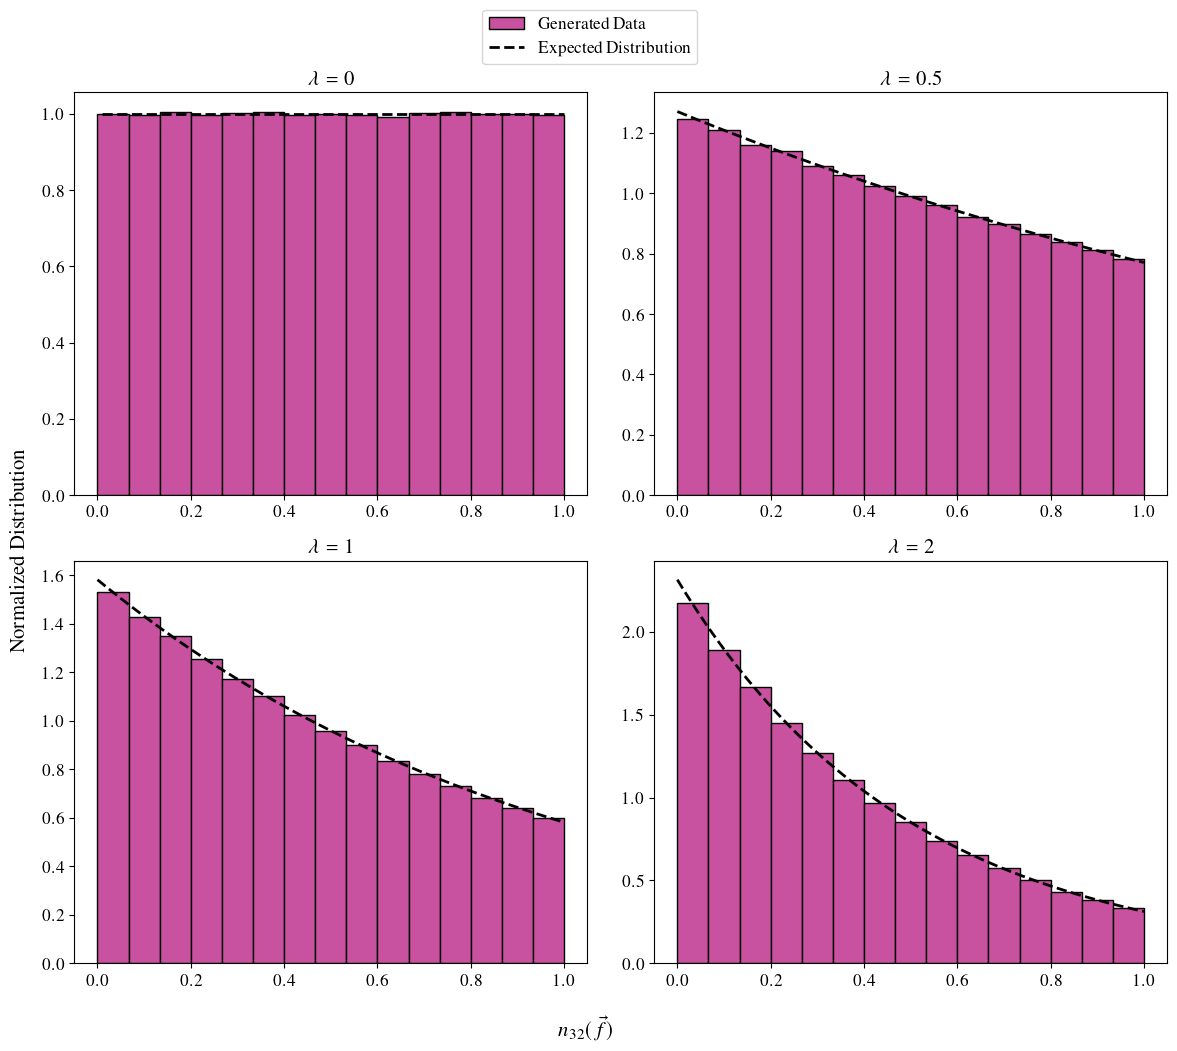

In [90]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
p = 32

def distribution_of_coin_flip(l, j):
    return 1 / (1 + np.exp(-l / (pow(2, j))))


def distribution_of_observable(l, x):
    if l == 0:
        return x / x
    return l / (1 - np.exp(-l)) * np.exp(-l * x)


def get_ax_index(index):
    if index == 0:
        return 0, 0
    elif index == 1:
        return 0, 1
    elif index == 2:
        return 1, 0
    else:
        return 1, 1


handles, labels = (), ()
for i, l in enumerate([0, 0.5, 1, 2]):
    ax_index = get_ax_index(i)
    generate_histogram(
        ax[ax_index],
        pow(10, 6),
        p,
        lambda j: distribution_of_coin_flip(l, j),
        label="Generated Data",
    )

    x = np.linspace(0, 1, 100)
    ax[ax_index].set_title(f"$\\lambda = {l}$")
    ax[ax_index].plot(
        x,
        distribution_of_observable(l, x),
        linewidth=2,
        color="black",
        linestyle="--",
        label="Expected Distribution",
    )
    ax[ax_index].legend()
    handles, labels = ax[ax_index].get_legend_handles_labels()
    ax[ax_index].get_legend().remove()

ldg = fig.legend(handles, labels, bbox_to_anchor=(0.6, 1.05))
fig.supylabel("Normalized Distribution")
fig.supxlabel(r"$n_{32}(\vec f)$")
fig.tight_layout(h_pad=1, w_pad=2, rect=[0, 0, 1, 1])
fig.savefig(
    FIGS_DIR / "different_distributions_hist.pdf",
    bbox_extra_artists=(ldg,),
    bbox_inches="tight",
)

# Exercise 4

/tmp/ipykernel_17732/3338158320.py:5: RuntimeWarning: divide by zero encountered in arctanh
  return 2 * dev * np.arctanh(2*np.sqrt(u) - 1) + mean


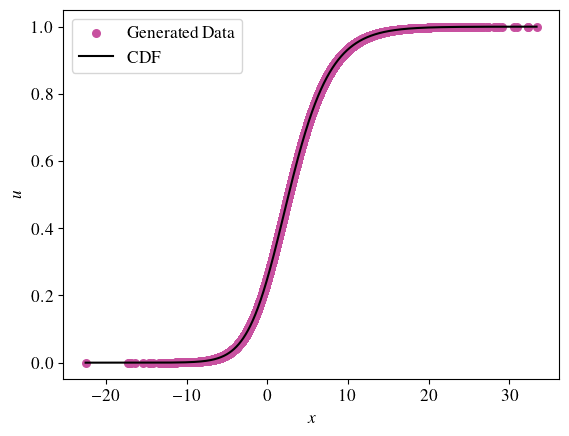

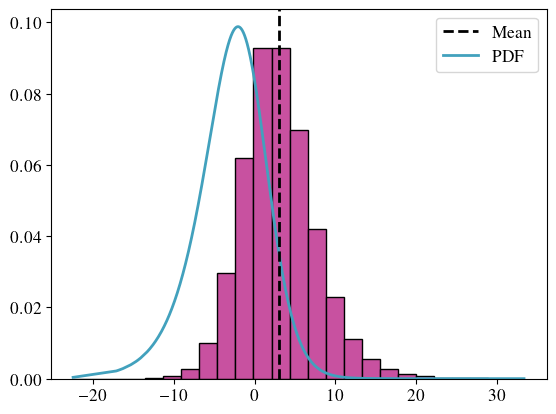

In [157]:
def cdf(x, mean, dev):
    return (1 + np.tanh((x - mean) / (2 * dev)))**2 / 4

def inverse_cdf(u, mean, dev):
   return 2 * dev * np.arctanh(2*np.sqrt(u) - 1) + mean 

def pdf(x, mean, dev):
    t = (x - mean) / (2 * dev)
    return (1 - np.tanh(t)) / (4 * dev * np.cosh(t)**2)

SAMPLE_SIZE = pow(10, 5)

u = np.random.uniform(low=0, high=1, size=(SAMPLE_SIZE, ))

# Check if the inverse is correct
mean, dev = 0, 3
x_high, x_low = inverse_cdf(1, mean, dev), inverse_cdf(0, mean, dev)

plt.figure(1)
plt.scatter(inverse_cdf(u, mean, dev), u, label="Generated Data", s=30, alpha=1, zorder=0)

# x = np.linspace(-15, 15, 200)
x = np.sort(inverse_cdf(u, mean, dev))
plt.plot(x, cdf(x, mean, dev), label="CDF", zorder=2, color="black")
# plt.xlim((-15, 15))
plt.ylabel("$u$")
plt.xlabel("$x$")
plt.legend()
plt.savefig(FIGS_DIR / "cdf_u_scatter_plot.png", dpi=400)

plt.figure(2)
plt.hist(x, bins=25, density=True)
plt.axvline(x.mean(), label="Mean", color="black", linestyle="--", zorder=100, linewidth=2)
plt.plot(x, pdf(x, mean, dev), label="PDF", linewidth=2)
plt.legend()

